In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_raw_train = pd.read_csv('C:/Users/Rafael/Code/Projetos/Melanoma/train.csv')
df_raw_test = pd.read_csv('C:/Users/Rafael/Code/Projetos/Melanoma/test.csv')

df_raw_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33126 entries, 0 to 33125
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     33126 non-null  object 
 1   patient_id                     33126 non-null  object 
 2   sex                            33061 non-null  object 
 3   age_approx                     33058 non-null  float64
 4   anatom_site_general_challenge  32599 non-null  object 
 5   diagnosis                      33126 non-null  object 
 6   benign_malignant               33126 non-null  object 
 7   target                         33126 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 2.0+ MB


In [12]:
df_train_pre = df_raw_train.copy(deep = True)
drop_column = ['image_name', 'diagnosis']
df_train_pre.drop(drop_column, axis=1, inplace = True)

df_train_pre['patient_id'] = df_train_pre['patient_id'].astype('category')
df_train_pre['patient_id'] = df_train_pre['patient_id'].cat.codes

df_train_pre['sex'] = df_train_pre['sex'].astype('category')
df_train_pre['sex'] = df_train_pre['sex'].cat.codes

df_train_pre['anatom_site_general_challenge'] = df_train_pre['anatom_site_general_challenge'].astype('category')
df_train_pre['anatom_site_general_challenge'] = df_train_pre['anatom_site_general_challenge'].cat.codes

df_train_pre['benign_malignant'] = df_train_pre['benign_malignant'].astype('category')
df_train_pre['benign_malignant'] = df_train_pre['benign_malignant'].cat.codes

df_train_pre['age_approx'].fillna(df_train_pre['age_approx'].median(), inplace = True)

print(df_train_pre.isnull().sum())
print('____________________________________________________________')
print(df_train_pre.groupby('anatom_site_general_challenge')['patient_id'].count())

patient_id                       0
sex                              0
age_approx                       0
anatom_site_general_challenge    0
benign_malignant                 0
target                           0
dtype: int64
____________________________________________________________
anatom_site_general_challenge
-1      527
 0     1855
 1     8417
 2      124
 3      375
 4    16845
 5     4983
Name: patient_id, dtype: int64


In [22]:
df_train = df_train_pre.copy(deep = True)

df_train['anatom_site_general_challenge'].loc[df_train_pre['anatom_site_general_challenge'] == -1] = 6
df_train['anatom_site_general_challenge'].loc[df_train_pre['anatom_site_general_challenge'] == 0] = 6
df_train['anatom_site_general_challenge'].loc[df_train_pre['anatom_site_general_challenge'] == 1] = 1
df_train['anatom_site_general_challenge'].loc[df_train_pre['anatom_site_general_challenge'] == 2] = 6
df_train['anatom_site_general_challenge'].loc[df_train_pre['anatom_site_general_challenge'] == 3] = 6
df_train['anatom_site_general_challenge'].loc[df_train_pre['anatom_site_general_challenge'] == 4] = 4
df_train['anatom_site_general_challenge'].loc[df_train_pre['anatom_site_general_challenge'] == 5] = 5

print(df_train.groupby('anatom_site_general_challenge')['patient_id'].count())
print('____________________________________________________________')
print(df_train.info())

anatom_site_general_challenge
1     8417
4    16845
5     4983
6     2881
Name: patient_id, dtype: int64
____________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33126 entries, 0 to 33125
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   patient_id                     33126 non-null  int16  
 1   sex                            33126 non-null  int8   
 2   age_approx                     33126 non-null  float64
 3   anatom_site_general_challenge  33126 non-null  int8   
 4   benign_malignant               33126 non-null  int8   
 5   target                         33126 non-null  int64  
dtypes: float64(1), int16(1), int64(1), int8(3)
memory usage: 679.5 KB
None


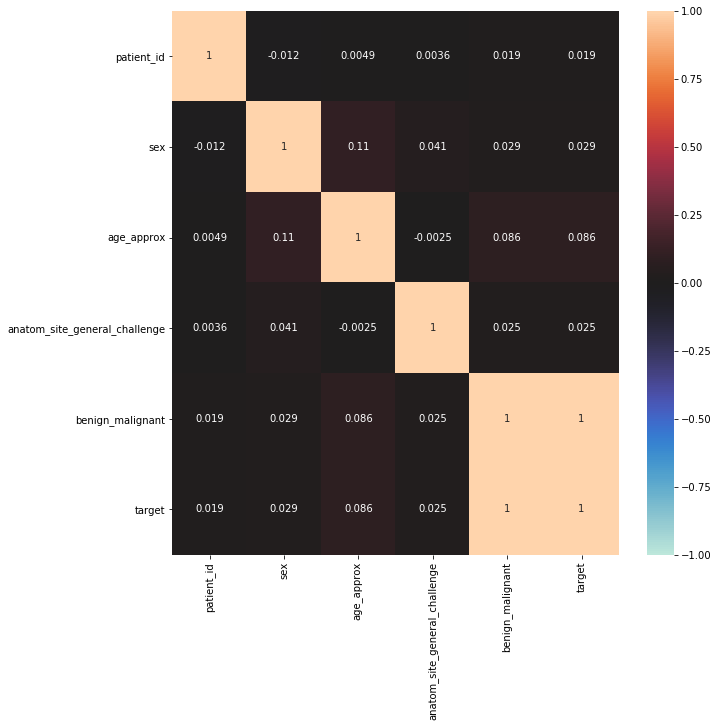

In [23]:
# plot correlational heatmap

plt.figure(figsize=(10, 10))
df_train_correlation = df_train.corr()
sns.heatmap(df_train_correlation, annot = True, vmin = -1, vmax = 1,center = 0)
plt.show()